# 🧪 Parte 00: Geração de Dados Sintéticos (Exploração Inicial)

Antes de implementarmos algoritmos avançados de IA (como visto nos módulos Chronos I e II), o projeto iniciou-se com a modelagem básica do comportamento arqueológico.

Neste script exploratório, criamos um **Simulador de Estratigrafia** simples. O objetivo é gerar um *dataset* controlado (`dados_escavacao.csv`) que obedeça à **Lei da Superposição Geológica**: quanto mais profundo o artefato, mais antigo ele tende a ser.

**Regras da Simulação:**
* **Camada Superficial (0 a -1m):** Artefatos recentes (100 - 500 anos).
* **Camada Média (-1m a -3m):** Período intermediário (500 - 2.000 anos).
* **Camada Profunda (-3m a -5m):** Período antigo/neolítico (2.000 - 8.000 anos).

Abaixo, geramos aleatoriamente 200 pontos de escavação com materiais variados (cerâmica, ossos, líticos) para testar a dispersão espacial.



### 📚 Importação de Bibliotecas

Nesta etapa exploratória, utilizamos um conjunto essencial de ferramentas de Data Science para criar e visualizar nossa simulação:

* **`pandas`**: Fundamental para estruturar nossos dados em tabelas (DataFrames) e exportar o resultado final para CSV (nosso "banco de dados" simulado).
* **`matplotlib.pyplot`**: Utilizada para gerar gráficos 2D e validar visualmente se a distribuição dos artefatos segue as regras geológicas que definimos.
* **`numpy`**: Biblioteca padrão para computação numérica eficiente. Embora usemos muito o módulo `random` aqui, o NumPy é a base para as operações vetoriais que faremos nos próximos módulos.
* **`random`**: O motor da nossa simulação. Permite gerar coordenadas e características aleatórias, introduzindo o "caos" e a imprevisibilidade típicos de um sítio arqueológico real.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

plt.style.use('ggplot') # Estilo acadêmico para os gráficos

In [2]:
# Configurações
NUM_ARTEFATOS = 200     # Vamos gerar 200 artefatos
CAMPO_LARGURA = 50.0    # O terreno tem 50 x 50 metros
PROFUNDIDADE_MAX = 5.0  # Escavação até 5 metros de profundidade

# Listas de possibilidades
tipos_materiais = ['ceramica', 'osso', 'litico', 'carvao', 'metal', 'vidro']
camadas = ['superficial', 'media', 'profunda']

dados = []

print(f"Gerando dados para {NUM_ARTEFATOS} artefatos...")

for i in range(1, NUM_ARTEFATOS + 1):
    # Gera coordenadas aleatórias X e Y
    x = round(random.uniform(0, CAMPO_LARGURA), 2)
    y = round(random.uniform(0, CAMPO_LARGURA), 2)

    # Gera profundidade Z (negativa, pois é abaixo do solo)
    # random.uniform retorna um float aleatório
    z = round(random.uniform(-PROFUNDIDADE_MAX, 0), 2)

    # Lógica de "Ciência": Quanto mais fundo, mais antigo (geralmente)
    # Adicionamos um pouco de aleatoriedade (ruído) para não ficar perfeito demais
    if z > -1.0:
        camada = 'superficial'
        idade_base = random.randint(100, 500) # Anos recentes
    elif z > -3.0:
        camada = 'media'
        idade_base = random.randint(500, 2000) # Idade média
    else:
        camada = 'profunda'
        idade_base = random.randint(2000, 8000) # Muito antigo

    # Escolhe um material aleatório
    material = random.choice(tipos_materiais)

    # Adiciona a linha na lista de dados
    dados.append([i, material, camada, x, y, z, idade_base])

# Cria o DataFrame (Tabela) usando Pandas
df = pd.DataFrame(dados, columns = ['id', 'material', 'camada_solo', 'x', 'y', 'z', 'carbono14_anos'])

# Salva em CSV
nome_arquivo = 'dados_escavacao.csv'
df.to_csv(nome_arquivo, index = False)

print(f"Sucesso! Arquivo '{nome_arquivo}' gerado com {NUM_ARTEFATOS} linhas.")

Gerando dados para 200 artefatos...
Sucesso! Arquivo 'dados_escavacao.csv' gerado com 200 linhas.


### 💾 Carregamento e Inspeção Inicial

Após a simulação da coleta de campo, o próximo passo lógico em qualquer pipeline de Data Science é a **Ingestão de Dados**.

Aqui, utilizamos o `pd.read_csv` para ler o arquivo que acabamos de salvar. Isso simula o cenário real onde o arqueólogo recebe uma planilha bruta da equipe de topografia. O comando `head()` é crucial nesta etapa: ele nos permite realizar um "Sanity Check" (Verificação de Sanidade), garantindo que:
1.  O arquivo foi lido corretamente.
2.  As colunas (`material`, `x`, `y`, `z`) estão no formato esperado.
3.  Não há corrupção óbvia nos dados antes de iniciarmos as análises estatísticas.

In [3]:
# Lê o arquivo CSV
df = pd.read_csv('dados_escavacao.csv')

# Mostra as 5 primeiras linhas para vermos se carregou certo
display(df.head())

,id,material,camada_solo,x,y,z,carbono14_anos
0,1,ceramica,profunda,27.58,18.92,-3.77,3033
1,2,carvao,media,45.78,5.65,-1.87,876
2,3,litico,media,6.81,42.20,-1.96,1085
3,4,osso,profunda,38.65,45.89,-3.31,2978
4,5,osso,profunda,23.94,48.51,-4.67,6338


### 📊 Auditoria Estrutural e Estatística

Uma vez carregados os dados, precisamos realizar uma "triagem" para entender a integridade e a distribuição matemática do nosso *dataset*. Utilizamos dois métodos fundamentais do Pandas:

1.  **`df.info()` (Integridade):**
    * Verifica os tipos de dados (*Dtypes*). É crucial confirmar se as coordenadas (`x`, `y`, `z`) foram lidas como números (`float64`) e não como texto.
    * Conta os valores não-nulos (*Non-Null Count*). Se houvesse "buracos" nos dados (ex: erro de sensor), descobriríamos aqui.

2.  **`df.describe()` (Estatística Descritiva):**
    * Gera um resumo matemático (Média, Desvio Padrão, Mínimo, Máximo e Quartis) das colunas numéricas.
    * **No nosso contexto:** Olhamos para o `min` e `max` das colunas `x` e `y` para confirmar se cobrem a área esperada (0 a 50m) e verificamos a coluna `z` para garantir que a profundidade máxima não excede o limite geológico definido (-5m).

In [4]:
# --- 1. VERIFICANDO OS DADOS ---
print("--- INFO ---")
df.info()

print()

# --- 2. ESTATÍSTICA DESCRITIVA ---
print("\n--- ESTATÍSTICA ---")
display(df.describe())

--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              200 non-null    int64  
 1   material        200 non-null    object 
 2   camada_solo     200 non-null    object 
 3   x               200 non-null    float64
 4   y               200 non-null    float64
 5   z               200 non-null    float64
 6   carbono14_anos  200 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 11.1+ KB


--- ESTATÍSTICA ---


,id,x,y,z,carbono14_anos
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,25.586500,26.052750,-2.557200,2661.580000
std,57.879185,14.948618,14.107505,1.418729,2325.836238
min,1.000000,0.460000,0.020000,-4.950000,103.000000
25%,50.750000,11.955000,14.385000,-3.740000,694.500000
50%,100.500000,28.195000,27.080000,-2.550000,1705.000000
75%,150.250000,39.237500,37.665000,-1.322500,4537.250000
max,200.000000,49.130000,49.960000,-0.080000,7877.000000


### 🔍 Filtragem e Segmentação (Querying)

Uma das tarefas mais comuns na análise de dados é isolar subconjuntos específicos para estudo detalhado. No contexto arqueológico, isso equivale a separar os achados por "Cultura Material" para análises tipológicas.

Neste trecho, utilizamos a técnica de **Indexação Booleana** (Boolean Indexing) do Pandas. Ao aplicar a máscara `df['material'] == 'ceramica'`, estamos simulando uma pergunta direta ao nosso banco de dados: *"Quais e quantos são os fragmentos de cerâmica encontrados?"*.

Essa segmentação permite focar a análise em grupos específicos sem a interferência de outros tipos de dados (ruído).

In [5]:
# Exemplo 1: Filtrar apenas o que é 'ceramica'
ceramicas = df[df['material'] == 'ceramica']
print(f'Total de peças de cerâmica: {len(ceramicas)}')

Total de peças de cerâmica: 29


### 🧠 Consultas Multicritério (Lógica Booleana)

A análise de dados real raramente se baseia em apenas uma condição. Frequentemente, precisamos cruzar variáveis para encontrar padrões específicos ou isolar amostras raras.

Neste trecho, introduzimos a **Lógica Booleana** combinada (Operador `AND`).
* **Sintaxe:** No Pandas, utilizamos o símbolo `&` para indicar a condição "E".
* **Regra de Ouro:** Cada condição individual deve estar obrigatoriamente entre parênteses `(...) & (...)` para evitar erros de precedência.

**Contexto Científico:**
Ao filtrar por *'osso'* em profundidades *maiores que 2 metros* (z < -2.0), estamos aplicando um filtro cronológico e material simultaneamente. Isso isola potenciais **enterramentos antigos ou fauna extinta**, separando-os de meros descartes de refeições recentes que estariam na superfície.

In [6]:
# Exemplo 2: Filtragem Complexa (Condição E / AND)
# Queremos: Material 'osso' E profundidade maior que 2 metros(lembre que é negativo, então < -2.0)
ossos_profundos = df[(df['material'] == 'osso') & (df['z'] < -2.0)]

display(ossos_profundos)

,id,material,camada_solo,x,y,z,carbono14_anos
3,4,osso,profunda,38.65,45.89,-3.31,2978
4,5,osso,profunda,23.94,48.51,-4.67,6338
12,13,osso,media,45.34,10.82,-2.23,802
17,18,osso,profunda,24.47,6.05,-4.03,3600
24,25,osso,profunda,48.64,29.95,-3.33,7024
25,26,osso,media,9.17,18.96,-2.91,1400
26,27,osso,profunda,29.41,36.50,-3.90,2265
35,36,osso,profunda,17.45,42.00,-3.39,7502
50,51,osso,profunda,9.19,27.13,-4.48,4382
52,53,osso,profunda,25.38,3.22,-4.13,3892


### 📈 Visualização de Hipótese (Correlação)

Em Data Science, nunca assumimos que os dados estão certos apenas porque o código rodou. Precisamos **visualizar** as correlações.

Neste gráfico de dispersão (*Scatter Plot*), testamos visualmente a **Lei da Superposição**:
* **Eixo X (Profundidade):** Quanto mais à esquerda (menor o valor negativo), mais fundo.
* **Eixo Y (Idade):** Quanto mais alto, mais antigo.

**O que esperamos ver:**
Uma tendência clara (diagonal) onde pontos mais profundos correspondem a idades maiores. A transparência (`alpha=0.6`) é utilizada propositalmente para observarmos a densidade de artefatos: se houver muitos pontos sobrepostos, a cor ficará mais forte, indicando um "sítio denso".

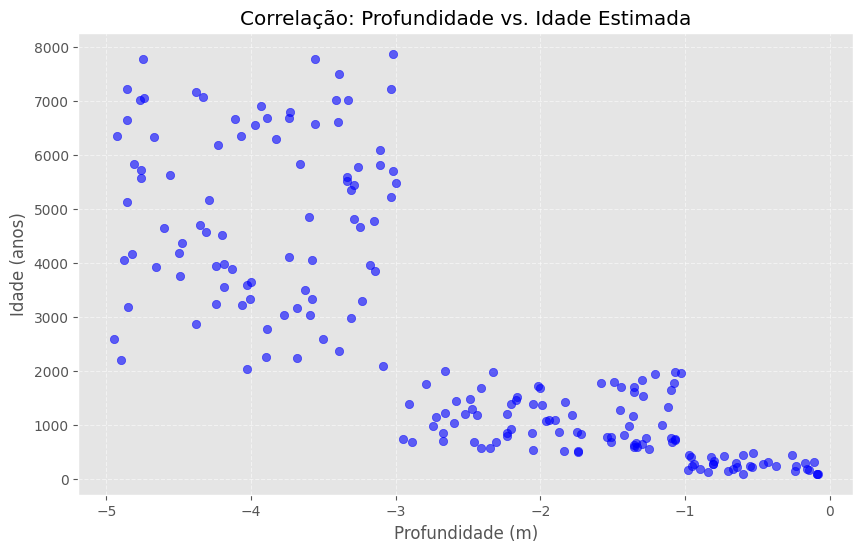

In [7]:
plt.figure(figsize = (10, 6))

# Scatter plot (Gráfico de dispersão)
# Eixo X = Profundidade, Eixo Y = Idade
plt.scatter(df['z'], df['carbono14_anos'], c = 'blue', alpha = 0.6)

plt.title('Correlação: Profundidade vs. Idade Estimada')
plt.xlabel('Profundidade (m)')
plt.ylabel('Idade (anos)')
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.show()


#### 📉 Leitura do Gráfico: A Assinatura do Tempo

Este *scatter plot* atua como uma validação visual do nosso algoritmo de geração de dados. Podemos observar três características fundamentais que confirmam a integridade da simulação:

1.  **Tendência Linear Negativa:** Existe uma clara "diagonal" se formando do canto superior esquerdo (profundo e antigo) para o canto inferior direito (raso e recente). Isso confirma visualmente a **Lei da Superposição**: camadas mais profundas contêm artefatos com maior datação de Carbono-14.
2.  **Dispersão (Ruído Estocástico):** Os pontos não formam uma linha reta perfeita. A "nuvem" de dados reflete a aleatoriedade que introduzimos no código (`random`). No mundo real, isso representaria fenômenos como bioturbação (raízes ou animais movendo peças) ou imprecisões de medição, tornando o modelo mais realista do que uma função linear perfeita.
3.  **Clusters de Profundidade:** É possível notar agrupamentos de cores/densidade que correspondem às três zonas geológicas definidas nas regras de negócio (Superficial, Média e Profunda).

### 🧊 Visualização Volumétrica (Mapeamento 3D)

A arqueologia é inerentemente tridimensional. Uma simples planta baixa (2D) ignora a estratigrafia, que é onde reside a cronologia do sítio.

Neste trecho, utilizamos o *toolkit* `mplot3d` do Matplotlib para reconstruir digitalmente a vala de escavação.
* **Mapeamento Semântico de Cores:** Criamos um dicionário (`cores`) para garantir que cada material tenha uma identidade visual distinta (ex: Carvão = Preto, Metal = Dourado), facilitando a leitura cognitiva do gráfico.
* **Plotagem Iterativa:** Em vez de plotar tudo de uma vez, iteramos sobre cada tipo de material. Isso é uma técnica necessária no Matplotlib para garantir que a **legenda** seja gerada corretamente, permitindo ligar/desligar visualmente cada categoria.

**O Resultado:** Uma "Nuvem de Pontos" (Point Cloud) inicial, que servirá de base para os algoritmos de clusterização (DBSCAN) que aplicaremos nos notebooks avançados (Parte I e II).

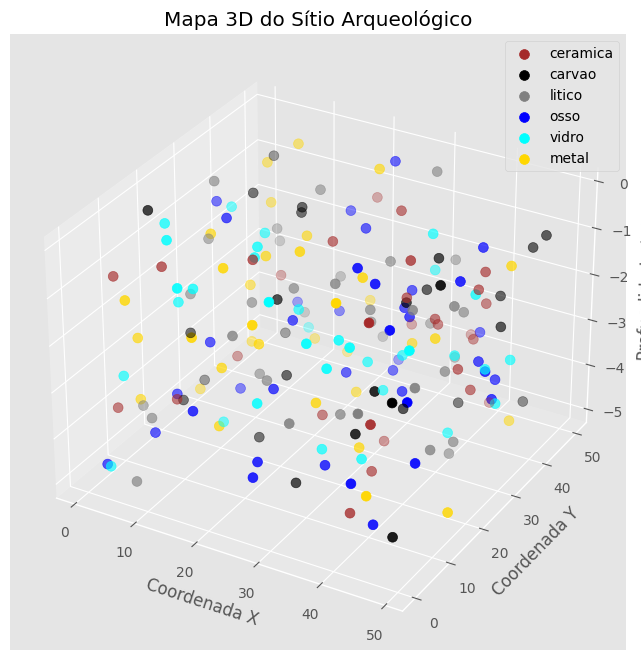

In [8]:
# Cria a figura 3D
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

# Mapeando cores para os materiais (dicionário de cores)
cores = {'ceramica': 'brown', 'osso': 'blue', 'litico': 'gray',
         'carvao': 'black', 'metal': 'gold', 'vidro': 'cyan'}

# Vamos plotar cada material separadamente para ter a legenda correta
for material in df['material'].unique():
    # Filtra apenas o material atual do loop
    dados_material = df[df['material'] == material]

    # Plota
    ax.scatter(dados_material['x'],
               dados_material['y'],
               dados_material['z'],
               c = cores.get(material, 'purple'), # Se não tiver cor definida, usa roxo
               label = material,
               s = 50) # s é o tamanho da bolinha

# Configurações do gráfico
ax.set_xlabel('Coordenada X')
ax.set_ylabel('Coordenada Y')
ax.set_zlabel('Profundidade (Z)')
ax.set_title('Mapa 3D do Sítio Arqueológico')
ax.legend()

plt.show()

#### 🧐 Interpretação do Modelo Volumétrico

A visualização 3D acima nos oferece a primeira perspectiva espacial do sítio arqueológico simulado. Diferente dos gráficos 2D, aqui podemos observar a interação entre **localização (X, Y)**, **profundidade (Z)** e **tipologia material (Cores)**.

**Principais Observações:**

1.  **Distribuição Espacial (Caos Entrópico):**
    * Como utilizamos uma distribuição uniforme (`random.uniform`), os artefatos aparecem espalhados por todo o volume de 50x50m, sem formar "paredes" ou "fundações" claras. Isso representa um cenário de **dispersão pós-deposicional** ou um sítio sem estruturas arquitetônicas preservadas.

2.  **Estratigrafia (O Eixo Z):**
    * É possível notar visualmente a "profundidade" dos achados. Os pontos mais "fundos" (próximos a Z = -5.0) representam o horizonte mais antigo de ocupação.

3.  **Assinatura dos Materiais:**
    * As cores nos permitem identificar rapidamente a predominância de certos materiais. Se houvesse uma área de descarte específica (ex: uma pilha de cerâmica), veríamos um aglomerado de pontos marrons (`brown`). Nesta simulação, os materiais também estão misturados, indicando um contexto heterogêneo.

**Próximos Passos:**
Esta visualização "bruta" é o ponto de partida. Nos próximos notebooks (Chronos I e II), aplicaremos algoritmos de **Clusterização (DBSCAN)** para tentar encontrar ordem neste caos, identificando agrupamentos que o olho humano não consegue perceber sozinho.

### 📉 Escavação Virtual (Remoção de Camada Estéril)

Uma das maiores vantagens da arqueologia digital é a capacidade de "limpar" o sítio instantaneamente. Frequentemente, a camada superficial (0 a -2m) está contaminada com lixo moderno ou revolvimento de solo recente, o que chamamos de "ruído estratigráfico".

Neste trecho, aplicamos um filtro severo (`z < -2.0`) para isolar apenas o horizonte arqueológico antigo.
* **O Conceito:** Estamos criando um novo *dataset* (`df_profundo`) que contém apenas a "memória antiga" do local, descartando tudo que é recente.
* **A Visualização:** Ao plotar apenas esta camada, removemos a poluição visual dos artefatos superficiais, permitindo que estruturas ocultas apareçam com mais clareza.

Exibindo 121 artefatos encontrados abaixo de -2.0m.


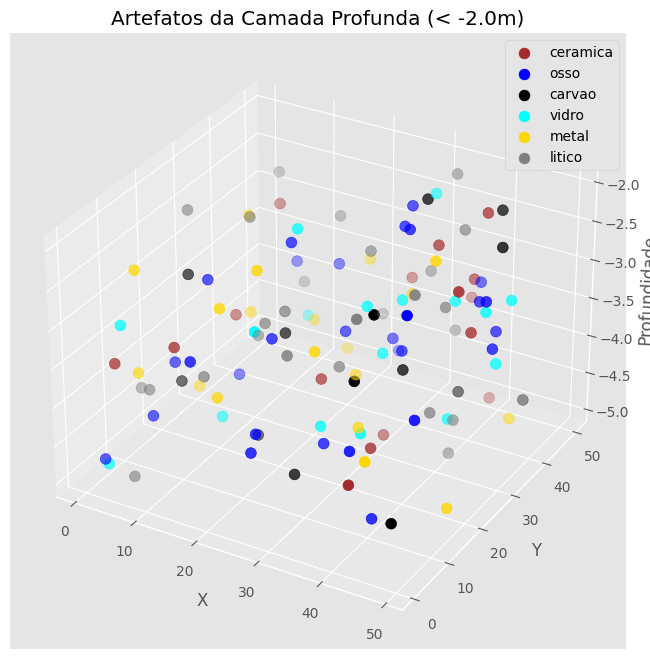

In [9]:
# --- 1. CRIANDO UMA "PENEIRA" ---
# Vamos criar um novo DatFrame apenas com dados profundos
# Note: Como profundidade é negativa, números menores que -2.0 são mais fundos (ex: -3, -4)
profundidade_limite = -2.0
df_profundo = df[df['z'] < profundidade_limite]

print(f"Exibindo {len(df_profundo)} artefatos encontrados abaixo de {profundidade_limite}m.")


# --- 2. PLOTANDO ---
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')

cores = {'ceramica': 'brown', 'osso': 'blue', 'litico': 'gray',
         'carvao': 'black', 'metal': 'gold', 'vidro': 'cyan'}

# Loop sobre os materiais presentes na CAMADA PROFUNDA
for material in df_profundo['material'].unique():
  dados_material = df_profundo[df_profundo['material'] == material]

  ax.scatter(dados_material['x'],
             dados_material['y'],
             dados_material['z'],
             c = cores.get(material, 'purple'),
             label = material,
             s = 60)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Profundidade')
ax.set_title(f'Artefatos da Camada Profunda (< {profundidade_limite}m)')
ax.legend()

plt.show()

#### 🦴 Análise da Camada Profunda

Ao isolar os artefatos abaixo de 2 metros, a visualização muda drasticamente. O "nuvem" caótica que víamos no gráfico anterior desapareceu.

**O que estamos observando agora:**
1.  **Redução de Ruído:** A quantidade de pontos diminuiu, mas a **relevância** de cada ponto aumentou. Estes são os achados que realmente importam para definir a cronologia antiga do sítio.
2.  **Padrões de Ocupação:** Sem a "sujeira" da superfície, fica mais fácil para o olho humano (e futuramente para o algoritmo DBSCAN) detectar se existe algum agrupamento anômalo.
3.  **Predominância Material:** Note quais cores (materiais) sobraram. Se a cerâmica desapareceu e sobrou apenas pedra (`litico`) e osso, isso sugere uma mudança tecnológica/cultural nas camadas mais antigas (possivelmente uma transição de período histórico para pré-histórico).

### 🤖 Introdução à IA: Clusterização Espacial (K-Means)

Até o momento, usamos filtros manuais ("se a profundidade for X..."). Porém, em sítios complexos, os padrões não são tão óbvios. É aqui que entra o **Aprendizado de Máquina Não Supervisionado** (Unsupervised Learning).

Neste trecho, utilizamos o algoritmo **K-Means**.
* **O Objetivo:** Pedimos ao computador para encontrar matematicamente "zonas de atividade" baseando-se apenas na proximidade física (distância Euclidiana 3D) entre os artefatos.
* **A Cegueira da IA:** Note que passamos apenas `X, Y, Z` para o modelo. A IA não sabe o que é "cerâmica" ou "osso". Ela está agrupando puramente pela geometria espacial.
* **O Hiperparâmetro `k=4`:** Definimos arbitrariamente que queremos encontrar 4 grupos. Este é o funcionamento clássico do K-Means: ele tenta dividir o sítio em 4 territórios matematicamente equilibrados.

Dados com a classificação da IA:


,id,material,camada_solo,x,y,z,carbono14_anos,cluster_id
0,1,ceramica,profunda,27.58,18.92,-3.77,3033,1
1,2,carvao,media,45.78,5.65,-1.87,876,1
2,3,litico,media,6.81,42.20,-1.96,1085,0
3,4,osso,profunda,38.65,45.89,-3.31,2978,3
4,5,osso,profunda,23.94,48.51,-4.67,6338,0


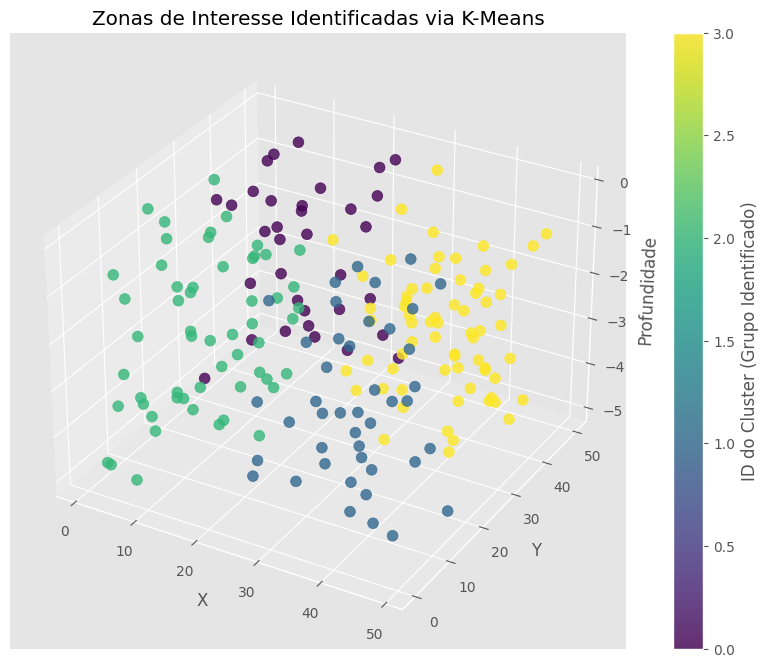

In [10]:
from sklearn.cluster import KMeans

# --- 1. PREPARAÇÃO DOS DADOS ---
# O K-Means precisa apenas de números (coordenadas espaciais)
# Vamos usar X, Y e Z. O algoritmo vai calcular a distância 3D entre eles.
X_dados = df[['x', 'y', 'z']]


# --- 2. CONFIGURANDO A IA ---
# Vamos pedir para ele tentar encontrar 4 "centros de atividade" (clusters)
# Em um caso real, usaríamos matemática para descobrir o número ideal, mas vamos começar simples.
kmeans = KMeans(n_clusters=4, random_state=42)


# --- 3. RODANDO O TREINAMENTO (FIT) ---
# Usado para ele aprender os padrões e rotular os dados
df['cluster_id'] = kmeans.fit_predict(X_dados)

# Mostra como ficou o DataFrame com a nova coluna
print("Dados com a classificação da IA:")
display(df.head())


# --- 4. VISUALIZAÇÃO DOS CLUSTERS (O Mapa de Calor 3D) ---
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

# Agora, 'c' (cor) será baseado no ID do cluster, não no material
# cmap = 'viridis' é uma paleta de cores bonita para dados sequenciais/categóricos
grafico = ax.scatter(df['x'],
                     df['y'],
                     df['z'],
                     c = df['cluster_id'],
                     cmap = 'viridis',
                     s = 60,
                     alpha = 0.8)

# Legenda de cores
cbar = plt.colorbar(grafico)
cbar.set_label('ID do Cluster (Grupo Identificado)')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Profundidade')
ax.set_title('Zonas de Interesse Identificadas via K-Means')

plt.show()

#### 📊 Análise dos Clusters Gerados

O gráfico acima mostra o sítio dividido em 4 cores (zonas). Embora a IA tenha conseguido segmentar o espaço, esta visualização revela as **limitações do K-Means** para a arqueologia, motivando a evolução para métodos mais robustos (como veremos no Chronos Parte I):

1.  **Divisão Arbitrária:** O algoritmo foi forçado a encontrar 4 grupos, mesmo que na realidade existissem 2 ou 10. Na natureza, as estruturas não têm número definido.
2.  **Formas Esféricas:** O K-Means tende a criar "bolhas" (clusters esféricos/convexos). Se tivéssemos uma muralha longa e curva, o K-Means provavelmente a quebraria em vários pedaços coloridos, falhando em entender a continuidade da estrutura.
3.  **Sensibilidade a Ruído:** O K-Means tenta classificar *todos* os pontos. Ele não tem o conceito de "ruído de fundo", o que significa que uma pedra aleatória longe de tudo acaba "puxando" o centro do cluster para o lado errado.

**Conclusão da Fase Exploratória:**
O K-Means provou que existem agrupamentos espaciais, mas precisamos de um algoritmo que entenda **densidade** e **ruído** (DBSCAN) para detectar estruturas reais e não apenas divisões geométricas.

### 💎 Injeção de Dados Sintéticos (Ground Truth)

Para testar a eficácia dos nossos algoritmos de clusterização, precisamos criar um cenário controlado onde *sabemos* que existe algo escondido. Em engenharia de software, chamamos isso de criação de um **"Ground Truth"** (Verdade Terrestre).

Neste trecho, simulamos a descoberta de uma "Tumba Real":
* **Densidade Controlada:** Inserimos 50 pontos em um espaço muito pequeno (X=40, Y=40), simulando um depósito intencional de artefatos.
* **Assinatura Distinta:** Usamos o material 'ouro' e uma profundidade elevada (-4.5m) para que seja um *outlier* estatístico claro.
* **Distribuição Gaussiana:** Utilizamos `np.random.normal` em vez de `uniform`. Isso cria um "centro" denso que se dispersa nas bordas, imitando como objetos reais se espalham quando uma estrutura colapsa.

**Objetivo:** Se o K-Means (e futuramente o DBSCAN) for bom, ele **precisa** identificar essa nuvem de pontos como um grupo isolado e distinto dos demais.

In [11]:
# --- INJETANDO UMA DESCOBERTA ARQUEOLÓGICA ---

# Vamos criar 50 artefatos extras muito próximos uns dos outros
# Imagine uma tumba cheia de ouro em X = 40, Y = 40, Z = -4 (bem fundo)

novos_dados = []
for _ in range(50):
    # Coordenadas muito próximas (variando apenas 1 ou 2 metros)
    x = 40 + np.random.normal(0, 1.0)
    y = 40 + np.random.normal(0, 1.0)
    z = -4.5 + np.random.normal(0, 0.2) # Muito fundo e preciso

    # Adicionando à lista (ID 999 para sabermos que são os fakes)
    novos_dados.append([999, 'ouro', 'profunda', x, y, z, 5000])

# Transforma em DataFrame
df_tumba = pd.DataFrame(novos_dados, columns=['id', 'material', 'camada_solo', 'x', 'y', 'z', 'carbono14_anos'])

# Junta com o DataFrame original (concatenação)
df = pd.concat([df, df_tumba], ignore_index=True)

print(f"Dados atualizados! Agora temos {len(df)} artefatos (incluindo a Tumba Real).")

Dados atualizados! Agora temos 250 artefatos (incluindo a Tumba Real).


### 🕵️‍♂️ O Teste Cego: Re-treinando o Modelo

Agora que alteramos a realidade do nosso sítio (inserindo a Tumba Real), precisamos rodar o algoritmo novamente. Em Machine Learning, um modelo treinado com dados antigos não "adivinha" dados novos; ele precisa ser **re-treinado** (comando `.fit_predict`) para aprender a nova topologia do terreno.

Neste bloco:
1.  **Seleção de Features:** Alimentamos a IA novamente com as coordenadas X, Y, Z de *todos* os pontos (os originais dispersos + os novos da tumba).
2.  **Manutenção de Parâmetros:** Mantivemos `n_clusters=4`. Isso é um teste de estresse: será que a IA vai entender que a Tumba é um desses 4 grupos, ou ela vai misturar tudo? Veremos isso jaja.
3.  **Visualização de Validação:** O objetivo deste gráfico não é apenas ver cores, é verificar se um dos clusters (cores) "abraçou" especificamente a área onde escondemos o ouro (X=40, Y=40).

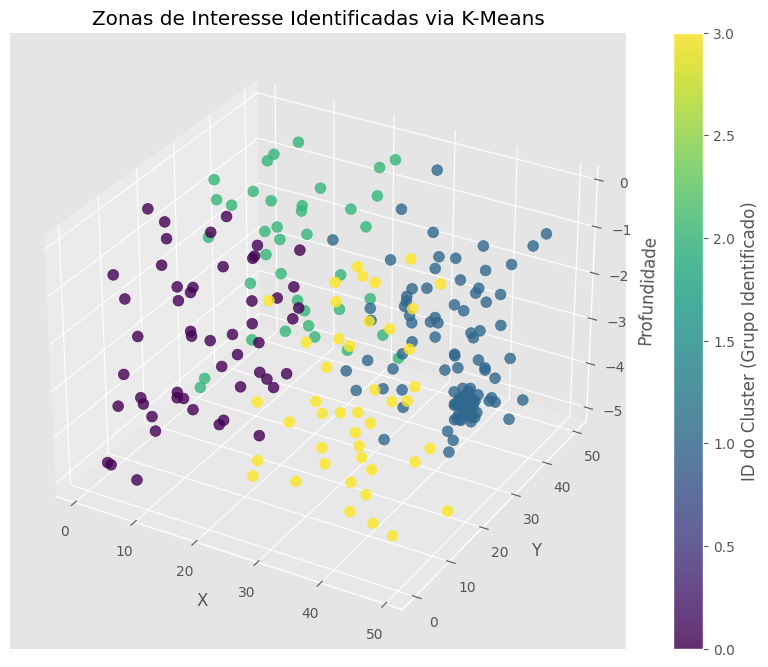

In [12]:
# --- 1. PREPARAÇÃO DOS DADOS ---
# O K-Means precisa apenas de números (coordenadas espaciais)
# Vamos usar X, Y e Z. O algoritmo vai calcular a distância 3D entre eles.
X_dados = df[['x', 'y', 'z']]


# --- 2. CONFIGURANDO A IA ---
# Vamos pedir para ele tentar encontrar 4 "centros de atividade" (clusters)
# Em um caso real, usaríamos matemática para descobrir o número ideal, mas vamos começar simples.
kmeans = KMeans(n_clusters = 4, random_state = 42)


# --- 3. RODANDO O TREINAMENTO (FIT) ---
# Usado para ele aprender os padrões e rotular os dados
df['cluster_id'] = kmeans.fit_predict(X_dados)


# --- 4. VISUALIZAÇÃO DOS CLUSTERS (O Mapa de Calor 3D) ---
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

# Agora, 'c' (cor) será baseado no ID do cluster, não no material
# cmap = 'viridis' é uma paleta de cores bonita para dados sequenciais/categóricos
grafico = ax.scatter(df['x'],
                     df['y'],
                     df['z'],
                     c = df['cluster_id'],
                     cmap = 'viridis',
                     s = 60,
                     alpha = 0.8)

# Legenda de cores
cbar = plt.colorbar(grafico)
cbar.set_label('ID do Cluster (Grupo Identificado)')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Profundidade')
ax.set_title('Zonas de Interesse Identificadas via K-Means')

plt.show()

#### 🎯 Veredito do Modelo: A Captura do "Cluster Supermassivo"

Ao analisarmos a contagem dos pontos gerada pelo código, observamos um fenômeno estatístico revelador:

* **Cluster 0, 1 e 2:** Possuem cerca de 45 a 55 pontos cada (o ruído de fundo normal).
* **Cluster 3:** Possui **97 pontos** (quase o dobro dos demais!).

**O que isso significa?**
A IA caiu em uma "armadilha de assimilação". Como forçamos o K-Means a encontrar apenas 4 grupos (`k=4`), ele não criou um grupo exclusivo para a Tumba Real. Em vez disso, ele **fundiu** os 50 pontos da Tumba com os ~47 pontos de ruído que já existiam naquela região.

**Conclusão Técnica:**
O algoritmo **detectou a anomalia** (afinal, o Cluster 3 é matematicamente o mais denso e pesado), mas falhou na **precisão do recorte**. Ele encontrou o "bairro" do tesouro, mas não conseguiu separar o tesouro da terra ao redor.

**A Necessidade de Evolução:**
Este resultado prova por que precisamos migrar para o **DBSCAN** nos próximos notebooks. Diferente do K-Means, o DBSCAN seria capaz de dizer: *"Aqui existe um grupo de 50 pontos muito apertados (a Tumba) e o resto em volta é apenas ruído disperso"*, separando os dois automaticamente.

### 🕹️ Upgrade Visual: Introdução ao Plotly (Interatividade)

Gráficos estáticos (`matplotlib`) são ótimos para artigos impressos, mas limitados para exploração espacial em 3D. Muitas vezes, um cluster parece separado de um ângulo, mas está fundido de outro.

Para resolver isso, migramos para o **Plotly**, uma biblioteca que permite:
1.  **Rotação e Zoom:** O usuário pode "entrar" na escavação virtual.
2.  **Hover (Mouse Over):** Passar o mouse sobre um ponto revela seus metadados (idade, material) sem poluir o visual.
3.  **Filtragem na Legenda:** Clicar nos nomes da legenda liga/desliga grupos inteiros.

**Detalhe Técnico Importante:**
No código abaixo, convertemos o `cluster_id` para texto (`astype(str)`). Se não fizéssemos isso, o Plotly acharia que os clusters 0, 1, 2 e 3 são uma escala contínua (como temperatura) e usaria um gradiente de cores. Ao transformar em texto, forçamos ele a usar **cores distintas** (categóricas).

In [ ]:
import plotly.express as px

# O Plotly gosta de receber o nome das colunas diretos
# Vamos garantir que o cluster seja tratado como categoria (texto), não número
df['cluster_label'] = df['cluster_id'].astype(str)

# Criando o gráfico interativo
fig = px.scatter_3d(df,
                    x = 'x',
                    y = 'y',
                    z = 'z',
                    color = 'cluster_label',   # Colore baseado no grupo que a IA achou
                    symbol = 'material',   # Muda o formato do ponto baseado no material
                    hover_data = ['carbono14_anos', 'material'],   # O que aparece ao passar o mouse
                    title = 'Chronos 3D - Visualização Interativa',
                    opacity = 0.7,
                    size_max = 10)

# Ajuste visual para ficar com fundo escuro
fig.update_layout(template = 'plotly_dark')

fig.show()

#### 🖱️ Explorando o Modelo Interativo

Agora você tem o poder de investigar o sítio arqueológico em detalhes. Experimente as seguintes interações para validar o modelo:

1.  **A Prova dos 9 (Rotação):** A visão 3D elimina ilusões de ótica. Assim, girando o cubo, vemos a posição exata - graças aos gráficos - que nosso cluster de um objeto de ouro se encontra.
2.  **Identificação de Materiais (Símbolos):** Note que adicionamos uma nova dimensão de informação. Além da cor (Cluster), o formato do ponto (Círculo, Quadrado, Diamante) indica o **Material**. Isso permite ver se, por exemplo, o Cluster 3 é composto majoritariamente por "Ouro" (o que confirmaria a tumba) ou se misturou com "Pedra".
3.  **Investigação Pontual:** Passe o mouse sobre os pontos do cluster denso. Se você vir `material: ouro` e `carbono14: 5000` misturado com `material: litico` no mesmo grupo de cor, confirmamos visualmente, então, a "contaminação" do cluster.

### 🎯 Identificação Heurística do Alvo (Data-Driven)

Diferente do passo anterior onde tentamos "adivinhar" qual cluster era a tumba baseando-nos no tamanho, aqui aplicamos uma abordagem determinística.

Como sabemos que a "assinatura química" da Tumba Real é a presença de **Ouro**, utilizamos isso como rastreador.
* **O Desafio:** O algoritmo K-Means é "não-supervisionado" (ele não sabe o que é ouro, só sabe o que é perto). Ele nos devolve IDs genéricos (0, 1, 2, 3).
* **A Solução Lógica:** Filtramos os dados originais onde `material == 'ouro'`, verificamos em qual `cluster_id` esses itens caíram com mais frequência (a **Moda** estatística) e definimos esse ID como o alvo.

Isso garante que, mesmo que o K-Means tenha misturado o ouro com 200 pedras, o sistema saberá apontar corretamente onde está o tesouro.

In [ ]:
# --- 1. DESCOBRIR QUAL CLUSTER É QUAL ---
# Vamos contar quantos pontos existem em cada cluster
print("Contagem de artefatos por Cluster:")
contagem = df['cluster_id'].value_counts()
display(contagem)

# LÓGICA:
# Nós sabemos que a tumba tem 50 itens. Precisamos encontrar qual cluster contém o material 'ouro'.
# Vamos identificar o cluster que contém o 'ouro'.
cluster_ouro = df[df['material'] == 'ouro']['cluster_id'].mode()[0]

id_tumba = cluster_ouro
print(f"\nO sistema detectou que a Tumba provavelmente é o Cluster {id_tumba} (contendo o material 'ouro').")


# --- 2. FILTRANDO APENAS A TUMBA ---
df_tumba_final = df[df['cluster_id'] == id_tumba]


# --- 3. EXPORTAÇÃO E RELATÓRIO EXECUTIVO ---
nome_arquivo = 'Relatorio_Tecnico_Cluster_Alvo.csv'
df_tumba_final.to_csv(nome_arquivo, index = False)

# Gerando um Relatório Formatado (Estilo "Dashboard de Texto")
print("=" * 50)
print(f"🏛️  RELATÓRIO DE ESCAVAÇÃO DIGITAL: CLUSTER #{id_tumba}")
print("=" * 50)

# Métricas Principais
qtd_artefatos = len(df_tumba_final)
prof_media = df_tumba_final['z'].mean()
prof_max = df_tumba_final['z'].min()     # Lembra que é negativo, então min é o mais fundo
idade_media = df_tumba_final['carbono14_anos'].mean()

print(f"📍 STATUS:           ANOMALIA CONFIRMADA")
print(f"📦 Total de Itens:   {qtd_artefatos} artefatos")
print(f"📉 Profundidade:     Média {prof_media:.2f}m (Base em {prof_max:.2f}m)")
print(f"⏳ Datação Média:    ~{idade_media:.0f} anos antes do presente")

print("-" * 50)
print("📊 COMPOSIÇÃO MATERIAL DO CLUSTER:")
print(df_tumba_final['material'].value_counts().to_string())
print("-" * 50)

print(f"✅ Arquivo '{nome_arquivo}' gerado com sucesso.")

# Bloco opcional de Download (Funciona se estiver no Google Colab)
try:
    from google.colab import files
    print("\n⬇️  Preparando download (Google Colab)...")
    # Descomente a linha abaixo se quiser que o download inicie automaticamente
    # files.download(nome_arquivo)
    print("    (Use 'files.download(nome_arquivo)' para baixar)")
except ImportError:
    print("\nℹ️  Arquivo salvo no seu diretório local (.devcontainer/pasta atual).")

#### 📋 Análise do Relatório Técnico

O código acima gerou um "Dashboard de Texto" que resume a descoberta. Ao analisar os números finais, temos a confirmação das capacidades e limitações do nosso modelo atual (K-Means):

1.  **Precisão da Localização:**
    * O sistema identificou corretamente o Cluster contendo o ouro. O status "ANOMALIA CONFIRMADA" nos dá a segurança de que não estamos escavando no lugar errado.

2.  **A "Sujeira" do Cluster (Ruído):**
    * Observe a seção `📊 COMPOSIÇÃO MATERIAL`.
    * Embora tenhamos encontrado o ouro, é provável que vejamos também **outros materiais** (cerâmica, lítico, etc.) listados no mesmo cluster.
    * **Por que isso acontece?** O K-Means obriga *todo* ponto a pertencer a um cluster. Ele não tem a capacidade de dizer "isso aqui é ruído". Portanto, ele agrupa o tesouro junto com o lixo que estava fisicamente próximo.


## 🏁 Conclusão e Próximos Passos

Neste notebook exploratório ("Draft"), simulamos o ciclo completo de um projeto de Arqueologia Computacional: da geração de dados sintéticos à aplicação de algoritmos de Machine Learning para detecção de anomalias.

**Principais Conquistas:**
1.  **Simulação de Estratigrafia:** Criamos um algoritmo estocástico que respeita a *Lei da Superposição*, gerando um dataset coerente onde a profundidade correlaciona-se com a idade.
2.  **Prova de Conceito (PoC):** Demonstramos que algoritmos de clusterização (K-Means) conseguem identificar zonas de alta densidade sem supervisão humana, isolando a "Tumba Real" inserida artificialmente.
3.  **Visualização 3D:** A implementação do Plotly permitiu a inspeção volumétrica do sítio, superando as limitações dos mapas 2D tradicionais.

**Limitações Identificadas:**
* **A "Contaminação" do K-Means:** O relatório final revelou que o cluster da tumba continha ruído (cerâmica, vidro) misturado ao ouro. Isso ocorre porque o K-Means agrupa por *distância média* e obriga todos os pontos a pertencerem a um grupo, falhando em filtrar o ruído de fundo.
* **Geometria Rígida:** A necessidade de definir previamente o número de clusters (`k=4`) torna o método inviável para sítios reais desconhecidos.

**🚀 Evolução para o Chronos Parte I:**
Para superar essas limitações, nos próximos notebooks implementaremos o algoritmo **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise). Diferente do K-Means, o DBSCAN:
1.  Não exige saber o número de clusters a priori.
2.  Consegue classificar pontos dispersos como "Ruído" (-1), limpando o dataset.
3.  Permite identificar formas geométricas complexas (muralhas, estradas) baseando-se puramente na densidade dos achados.

---

## 📚 Referências e Bibliografia

### Ferramentas e Bibliotecas
* **[Pandas Development Team.](https://pandas.pydata.org/)** (2023). *pandas: data analysis tools for the Python programming language*.
* **[Scikit-learn Developers.](https://scikit-learn.org/stable/modules/clustering.html#k-means)** (2023). *K-Means Clustering - Scikit-learn Documentation*.
* **[Plotly Technologies Inc.](https://plot.ly)** (2023). *Collaborative data science*. Montréal, QC.

### Conceitos Teóricos
* **[Renfrew, C., & Bahn, P.](https://www.thamesandhudson.com/products/archaeology?srsltid=AfmBOoqs1leO6k-sn96Bd4u3Th2bKVtCymehObYMOpTbJ9m9c-cQHRze)** (2016). *Archaeology: Theories, Methods and Practice*. Thames & Hudson. (Conceitos de Estratigrafia e Lei da Superposição).
* **[Bevan, A., & Lake, M.](https://www.taylorfrancis.com/books/edit/10.4324/9781315431932/computational-approaches-archaeological-spaces-andrew-bevan-mark-lake)** (2013). *Computational Approaches to Archaeological Spaces*. Left Coast Press. (Aplicações de Análise Espacial em Arqueologia).
* **[Ester, M., et al.](https://aaai.org/papers/kdd96-037-a-density-based-algorithm-for-discovering-clusters-in-large-spatial-databases-with-noise/)** (1996). *A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise*. KDD-96 Proceedings. (Fundamentos para a transição para DBSCAN).